In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(666)
x = np.random.uniform(-3,3,100)
X = x.reshape(-1,1)
y = 0.5*x**2 + x + 2 +np.random.normal(0,1,size=len(x))

In [4]:
#使用 管道    Pipeline
def PolynomialRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',LinearRegression())   
    ]
    )

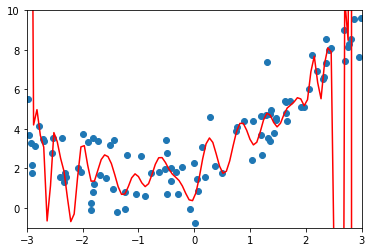

In [7]:
#传入100
poly100_reg = PolynomialRegression(100)
poly100_reg.fit(X,y)
y_predict = poly100_reg.predict(X)

# 我们这次取值是均匀的取值  ，因此不会出现两个点之间相隔太大的情况
X_plot = np.linspace(-3,3,100).reshape(-1,1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(X,y)
plt.plot(X_plot,y_plot,color='r')
plt.axis([-3,3,-1,10])
plt.show()

In [ ]:
#这是我们过拟合产生的数据  误差变小了

# train_test_split的意义

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

In [12]:
#将预测的和测试比较    线性
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)

2.6604003027100882

In [13]:
#2元
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train,y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

0.80700189143335166

In [14]:
#10元
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train,y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test,y10_predict)

1.015869395647145

In [16]:
#100元
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train,y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test,y100_predict)

14362614495.010767

In [17]:
#当我们degree取100的时候，虽然他比我们的取10  或 2   的训练数据集拟合程度更高，但是
#面对新的数据的时候，他的预测结果是更差的，因此  我们选用的模型绝不可能是100的

In [64]:
X_ = np.empty(100)
y_ = np.empty(100)
for i in range(1,100):
    
    poly__reg = PolynomialRegression(degree=i)
    poly__reg.fit(X_train,y_train)
    y__predict = poly__reg.predict(X_test)
    y_[i]= mean_squared_error(y_test,y__predict)
    X_[i]=i

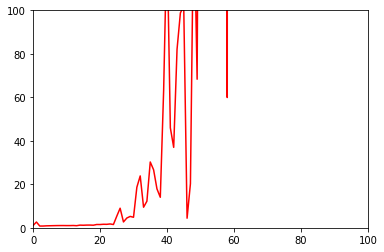

In [67]:

plt.plot(X_,y_,color='r')
plt.axis([0,100,0,100])
plt.show()